# Задание 1. Анализ результатов ОГЭ

## 0. Импорт библиотек, загрузка данных.

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#files.upload()

General state exam

In [ ]:
gse = pd.read_excel('5_OGE_2019_Эксперты и анализ.xlsx')  # pd.read_excel и т.п.

In [ ]:
gse = gse.drop(['GIA', 'Код предмета', 'Предмет'], axis=1)

In [ ]:
gse

,Код ОО,Краткое наименование ОО,Вид ОО,Тип ОО,Выпускник,Вариант,Часть В,1_Часть В,2_Часть В,3_Часть В,4_Часть В,5_Часть В,6_Часть В,7_Часть В,8_Часть В,9_Часть В,10_Часть В,11_Часть В,12_Часть В,13_Часть В,14_Часть В,15_Часть В,16_Часть В,17_Часть В,18_Часть В,Часть С,1_Часть С,2_Часть С,Часть D,Первичный балл,% Оценка,Оцека по 100,Оцека по 5
0,201033,МБОУ СОШ № 3 с. Александров-Гай Александрово-Г...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,75657,-++++-+++++++++---,-,+,+,+,+,-,+,+,+,+,+,+,+,+,+,-,-,-,0(2)2(2),0,2,NaN,15,68,0,4
1,203063,МОУ - СОШ № 9 г. Аткарска Саратовской области,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,73202,++++++++++++++++++,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,2(2)2(2),2,2,NaN,22,100,0,5
2,203063,МОУ - СОШ № 9 г. Аткарска Саратовской области,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74018,++-++-++-+---+----,+,+,-,+,+,-,+,+,-,+,-,-,-,+,-,-,-,-,0(2)0(2),0,0,NaN,8,36,0,3
3,204023,"МБОУ ""СОШ № 2 р.п. Базарный-Карабулак""",Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74810,+++++++++-+-+-+-++,+,+,+,+,+,+,+,+,+,-,+,-,+,-,+,-,+,+,0(2)2(2),0,2,NaN,16,72,0,4
4,205015,МАОУ Гимназия № 1,Гимназия,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74810,++++++++-++-++++++,+,+,+,+,+,+,+,+,-,+,+,-,+,+,+,+,+,+,2(2)0(2),2,0,NaN,18,81,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,247053,"МОУ ""СОШ № 43""",Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,80255,+-++++-+++--+++++-,+,-,+,+,+,+,-,+,+,+,-,-,+,+,+,+,+,-,1(2)0(2),1,0,NaN,14,63,0,4
5982,247073,"МОУ ""СОШ № 83""",Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74018,+++++++++-+++++-++,+,+,+,+,+,+,+,+,+,-,+,+,+,+,+,-,+,+,0(2)1(2),0,1,NaN,17,77,0,4
5983,247093,"МОУ ""СОШ № 106""",Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74018,+++++++++-+++++-++,+,+,+,+,+,+,+,+,+,-,+,+,+,+,+,-,+,+,2(2)2(2),2,2,NaN,20,90,0,5
5984,247093,"МОУ ""СОШ № 106""",Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,75657,+++-++++++++++++++,+,+,+,-,+,+,+,+,+,+,+,+,+,+,+,+,+,+,2(2)2(2),2,2,NaN,21,95,0,5


## 1. Общая статистика (количество, минимальный, максимальный, среднее, медиана, мода, среднеквадратическое отклонение).

In [ ]:
gse['Первичный балл'].aggregate(['count', 'min', 'max', 'mean', np.median, statistics.mode, np.std])

count     5986.000000
min          0.000000
max         22.000000
mean        13.290511
median      14.000000
mode        13.000000
std          5.408305
Name: Первичный балл, dtype: float64

## 2. Статистика количества сдававших и оценок по видам школ (СОШ, гимназия, лицей и т.д.), гистограмма.

In [ ]:
gse_school_type = gse.groupby('Вид ОО')

In [ ]:
gse_school_type_score = gse_school_type['Первичный балл'].aggregate(['count', 'min', 'max', 'mean', np.median])

In [ ]:
gse_school_type_score.head()

,count,min,max,mean,median
Вид ОО,,,,,
Вечерняя (сменная) общеобразовательная школа,11,1,6,3.454545,3.0
Гимназия,473,3,22,16.528541,18.0
Кадетская школа-интернат,10,13,20,16.800000,17.5
Лицей,969,1,22,16.350877,17.0
Лицей-интернат,91,4,22,14.703297,15.0


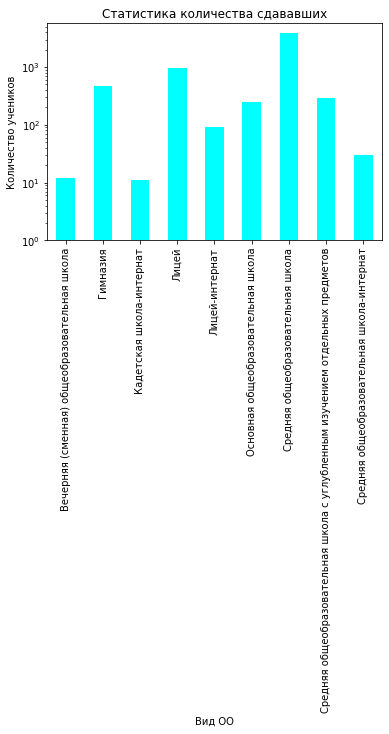

In [ ]:
hist_count = gse_school_type_score['count'].plot.bar(color=(0, 1, 1),
                                                     #figsize=(6, 15),
                                                     title='Статистика количества сдававших', 
                                                     ylabel='Количество учеников',
                                                     log=True)

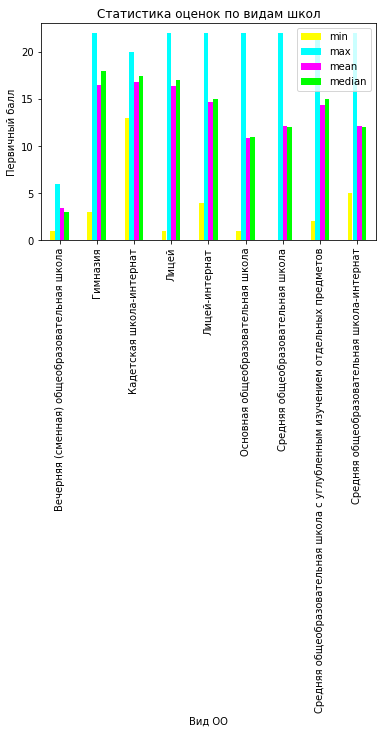

In [ ]:
hist_score_statistics = gse_school_type_score.drop(labels='count', axis=1).plot.bar(color=((1, 1, 0), (0, 1, 1), (1, 0, 1), (0, 1, 0)), 
                                                                                    title='Статистика оценок по видам школ', 
                                                                                    ylabel='Первичный балл')

## 3. Статистика количества сдававших и оценок по районам, гистограмма.

*Первые три цифры кода ОО - код района*

In [ ]:
gse['Код района'] = gse['Код ОО'] // 1000

In [ ]:
gse_regions = gse.groupby('Код района')

In [ ]:
gse_regions_score = gse_regions['Первичный балл'].aggregate(['count', 'min', 'max', 'mean', np.median])

In [ ]:
gse_regions_score

,count,min,max,mean,median
Код района,,,,,
201,83,1,21,11.578313,12.0
202,21,1,16,9.619048,11.0
203,63,6,22,13.936508,14.0
204,79,1,22,11.316456,11.0
205,511,0,22,13.109589,13.0
206,278,1,22,12.532374,13.0
207,11,2,21,12.727273,13.0
208,196,0,22,10.459184,10.0
209,3,11,20,15.000000,14.0


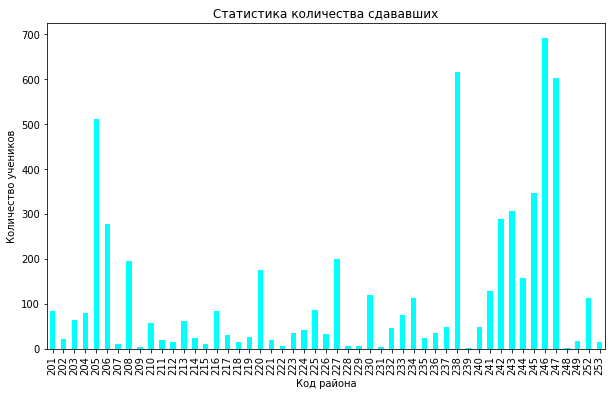

In [ ]:
hist_count = gse_regions_score['count'].plot.bar(color=(0, 1, 1), 
                                                 figsize=(10, 6), 
                                                 title='Статистика количества сдававших', 
                                                 ylabel='Количество учеников')

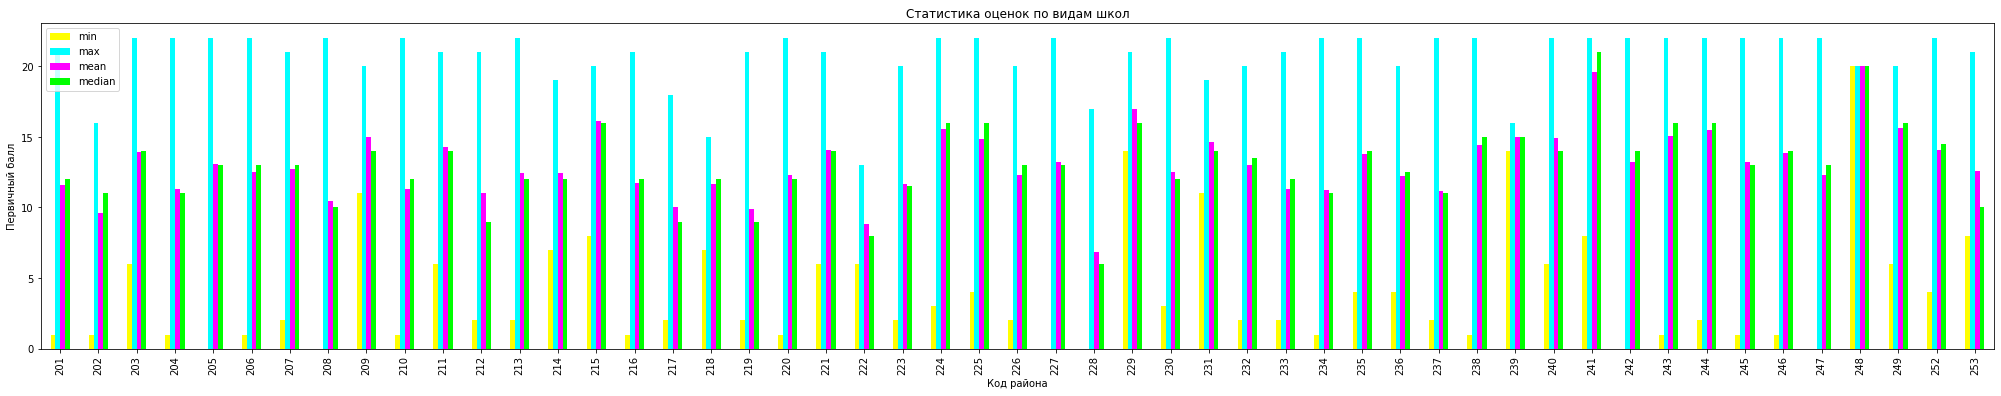

In [ ]:
hist_score_statistics = gse_regions_score.drop(labels='count', axis=1).plot.bar(color=((1, 1, 0), (0, 1, 1), (1, 0, 1), (0, 1, 0)), 
                                                                                figsize=(35,6), 
                                                                                title='Статистика оценок по видам школ', 
                                                                                ylabel='Первичный балл')

## 4. 10 лучших школ (не учитывать школы, из которых участвовало менее 10 учеников).

In [ ]:
gse_school_code = gse.groupby('Код ОО')['Первичный балл'].aggregate(['count', 'median'])

In [ ]:
gse_school_code.loc[gse_school_code['count'] < 10, 'median'] = -1

In [ ]:
gse_school_code.head(10)

,count,median
Код ОО,,
201013,33,12.0
201023,15,10.0
201033,19,13.0
201053,13,9.0
201093,3,-1.0
202023,13,8.0
202033,2,-1.0
202034,1,-1.0
202083,2,-1.0


In [ ]:
gse_school_code_sorted_descending = gse_school_code.sort_values(by='median', ascending=False)

In [ ]:
gse_school_code_sorted_descending.head(10)

,count,median
Код ОО,,
245016,49,21.0
205015,26,21.0
244015,29,21.0
241036,106,21.0
224093,23,20.0
246046,25,20.0
243015,47,20.0
238023,15,20.0
243026,52,20.0


## 5. 10 худших школ.

In [ ]:
gse_school_code = gse.groupby('Код ОО')['Первичный балл'].aggregate(['count', 'median'])

In [ ]:
gse_school_code.loc[gse_school_code['count'] < 10, 'median'] = 23

In [ ]:
gse_school_code.head(10)

,count,median
Код ОО,,
201013,33,12.0
201023,15,10.0
201033,19,13.0
201053,13,9.0
201093,3,23.0
202023,13,8.0
202033,2,23.0
202034,1,23.0
202083,2,23.0


In [ ]:
gse_school_code_sorted_ascending = gse_school_code.sort_values(by='median')

In [ ]:
gse_school_code_sorted_ascending.head(10)

,count,median
Код ОО,,
206018,11,3.0
237013,12,6.0
205263,35,6.0
247103,14,6.5
220043,20,6.5
219013,14,6.5
246213,31,7.0
208103,21,7.0
205063,30,7.0


## 6. Проверка гипотезы: зависимость результатов от удалённости от областного центра.

In [ ]:
#files.upload()

In [ ]:
geo = pd.read_excel('geo.xlsx')  # pd.read_excel и т.п.

In [ ]:
geo

,Код района,Район,Расстояние до Саратова
0,201,Алгайский,265
1,202,Аркадакский,239
2,203,Аткарский,106
3,204,Базарно-Карабулакский,103
4,205,Балаковский,163
5,206,Балашовский,211
6,207,Балтайский,138
7,208,Вольский,149
8,210,Дергачевский,224
9,212,Екатериновский,154


In [ ]:
full_data_gse_geo = pd.merge(gse, geo)

In [ ]:
full_data_gse_geo

,Код ОО,Краткое наименование ОО,Вид ОО,Тип ОО,Выпускник,Вариант,Часть В,1_Часть В,2_Часть В,3_Часть В,4_Часть В,5_Часть В,6_Часть В,7_Часть В,8_Часть В,9_Часть В,10_Часть В,11_Часть В,12_Часть В,13_Часть В,14_Часть В,15_Часть В,16_Часть В,17_Часть В,18_Часть В,Часть С,1_Часть С,2_Часть С,Часть D,Первичный балл,% Оценка,Оцека по 100,Оцека по 5,Код района,Район,Расстояние до Саратова
0,201033,МБОУ СОШ № 3 с. Александров-Гай Александрово-Г...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,75657,-++++-+++++++++---,-,+,+,+,+,-,+,+,+,+,+,+,+,+,+,-,-,-,0(2)2(2),0,2,NaN,15,68,0,4,201,Алгайский,265
1,201013,МБОУ СОШ № 1 с. Александров-Гай Александрово-Г...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74018,++--++++++---++---,+,+,-,-,+,+,+,+,+,+,-,-,-,+,+,-,-,-,0(2)0(2),0,0,NaN,10,45,0,3,201,Алгайский,265
2,201013,МБОУ СОШ № 1 с. Александров-Гай Александрово-Г...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74810,++--+++++++--+-+++,+,+,-,-,+,+,+,+,+,+,+,-,-,+,-,+,+,+,0(2)0(2),0,0,NaN,13,59,0,4,201,Алгайский,265
3,201053,МБОУ СОШ с. Новоалександровка имени Героя Сове...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,76449,+++++++++-++++-+++,+,+,+,+,+,+,+,+,+,-,+,+,+,+,-,+,+,+,0(2)0(2),0,0,NaN,16,72,0,4,201,Алгайский,265
4,201013,МБОУ СОШ № 1 с. Александров-Гай Александрово-Г...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,80255,-+++--++-+---+-+++,-,+,+,+,-,-,+,+,-,+,-,-,-,+,-,+,+,+,0(2)0(2),0,0,NaN,10,45,0,3,201,Алгайский,265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,229013,МОУ Романовская СОШ Романовского района Сарато...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,73202,++++++-++-+-++++++,+,+,+,+,+,+,-,+,+,-,+,-,+,+,+,+,+,+,0(2)1(2),0,1,NaN,16,72,0,4,229,Романовский,253
5816,229013,МОУ Романовская СОШ Романовского района Сарато...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,80255,-+-+++++-++++-++++,-,+,-,+,+,+,+,+,-,+,+,+,+,-,+,+,+,+,0(2)0(2),0,0,NaN,14,63,0,4,229,Романовский,253
5817,229013,МОУ Романовская СОШ Романовского района Сарато...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74810,++++--+++++-++-+++,+,+,+,+,-,-,+,+,+,+,+,-,+,+,-,+,+,+,0(2)0(2),0,0,NaN,14,63,0,4,229,Романовский,253
5818,229073,"МОУ ""Усть-Щербединская СОШ с. Усть-Щербедино Р...",Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74018,+++++++++++++++-++,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,-,+,+,2(2)2(2),2,2,NaN,21,95,0,5,229,Романовский,253


In [ ]:
results_distance = full_data_gse_geo.groupby(['Расстояние до Саратова']).aggregate(['median'])

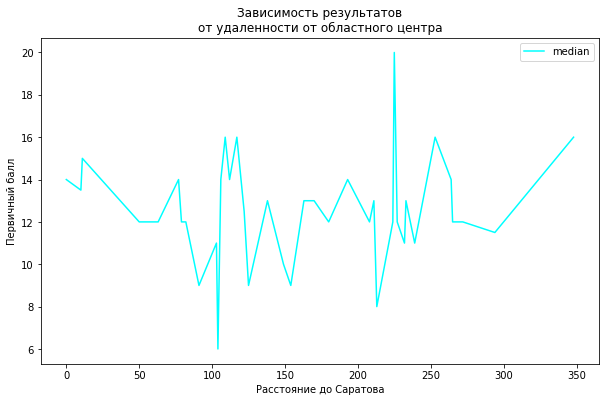

In [ ]:
results_distance['Первичный балл'].plot(color=(0, 1, 1),
                                        figsize=(10, 6),
                                        title='''Зависимость результатов
от удаленности от областного центра''',
                                        ylabel='Первичный балл')

In [ ]:
full_data_gse_geo['ten kilometers'] = 10 * (full_data_gse_geo['Расстояние до Саратова'] // 10)
results_distance_2 = full_data_gse_geo.pivot_table('Первичный балл', index='ten kilometers', aggfunc='mean')
results_distance_2

,Первичный балл
ten kilometers,
0,13.873513
10,14.353474
50,12.358025
60,12.298851
70,12.174757
80,11.302632
90,9.880000
100,13.197425
110,15.857143


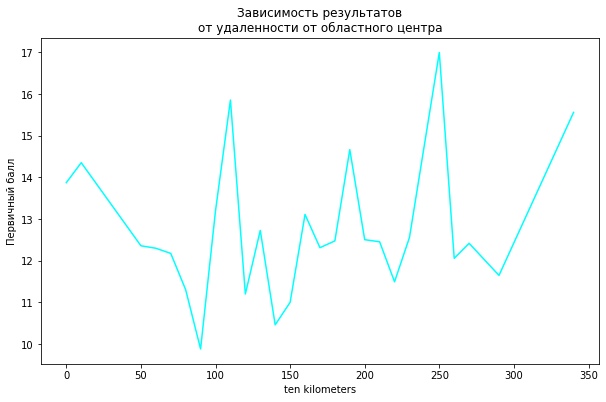

In [ ]:
results_distance_2['Первичный балл'].plot(color=(0, 1, 1),
                                        figsize=(10, 6),
                                        title='''Зависимость результатов
от удаленности от областного центра''',
                                        ylabel='Первичный балл')

## 7.* Проверка гипотезы: зависимость результатов от размера населённого пункта, в котором расположено образовательное учреждение (по численности населения). 

In [ ]:
population = pd.read_excel('population_Ogneva.xlsx')  # pd.read_excel и т.п.

In [ ]:
population

,Код района,Район,Численность населения
0,201.0,Алгайский,15253.0
1,202.0,Аркадакский,21601.0
2,203.0,Аткарский,39067.0
3,204.0,Базарно-Карабулакский,27790.0
4,205.0,Балаковский,207995.0
5,206.0,Балашовский,104934.0
6,207.0,Балтайский,10887.0
7,208.0,Вольский,86950.0
8,210.0,Дергачевский,17897.0
9,212.0,Екатериновский,18051.0


In [ ]:
full_data_gse_population = pd.merge(gse, population)

In [ ]:
full_data_gse_population

,Код ОО,Краткое наименование ОО,Вид ОО,Тип ОО,Выпускник,Вариант,Часть В,1_Часть В,2_Часть В,3_Часть В,4_Часть В,5_Часть В,6_Часть В,7_Часть В,8_Часть В,9_Часть В,10_Часть В,11_Часть В,12_Часть В,13_Часть В,14_Часть В,15_Часть В,16_Часть В,17_Часть В,18_Часть В,Часть С,1_Часть С,2_Часть С,Часть D,Первичный балл,% Оценка,Оцека по 100,Оцека по 5,Код района,Район,Численность населения
0,201033,МБОУ СОШ № 3 с. Александров-Гай Александрово-Г...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,75657,-++++-+++++++++---,-,+,+,+,+,-,+,+,+,+,+,+,+,+,+,-,-,-,0(2)2(2),0,2,NaN,15,68,0,4,201,Алгайский,15253.0
1,201013,МБОУ СОШ № 1 с. Александров-Гай Александрово-Г...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74018,++--++++++---++---,+,+,-,-,+,+,+,+,+,+,-,-,-,+,+,-,-,-,0(2)0(2),0,0,NaN,10,45,0,3,201,Алгайский,15253.0
2,201013,МБОУ СОШ № 1 с. Александров-Гай Александрово-Г...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74810,++--+++++++--+-+++,+,+,-,-,+,+,+,+,+,+,+,-,-,+,-,+,+,+,0(2)0(2),0,0,NaN,13,59,0,4,201,Алгайский,15253.0
3,201053,МБОУ СОШ с. Новоалександровка имени Героя Сове...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,76449,+++++++++-++++-+++,+,+,+,+,+,+,+,+,+,-,+,+,+,+,-,+,+,+,0(2)0(2),0,0,NaN,16,72,0,4,201,Алгайский,15253.0
4,201013,МБОУ СОШ № 1 с. Александров-Гай Александрово-Г...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,80255,-+++--++-+---+-+++,-,+,+,+,-,-,+,+,-,+,-,-,-,+,-,+,+,+,0(2)0(2),0,0,NaN,10,45,0,3,201,Алгайский,15253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,229013,МОУ Романовская СОШ Романовского района Сарато...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,73202,++++++-++-+-++++++,+,+,+,+,+,+,-,+,+,-,+,-,+,+,+,+,+,+,0(2)1(2),0,1,NaN,16,72,0,4,229,Романовский,13701.0
5816,229013,МОУ Романовская СОШ Романовского района Сарато...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,80255,-+-+++++-++++-++++,-,+,-,+,+,+,+,+,-,+,+,+,+,-,+,+,+,+,0(2)0(2),0,0,NaN,14,63,0,4,229,Романовский,13701.0
5817,229013,МОУ Романовская СОШ Романовского района Сарато...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74810,++++--+++++-++-+++,+,+,+,+,-,-,+,+,+,+,+,-,+,+,-,+,+,+,0(2)0(2),0,0,NaN,14,63,0,4,229,Романовский,13701.0
5818,229073,"МОУ ""Усть-Щербединская СОШ с. Усть-Щербедино Р...",Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74018,+++++++++++++++-++,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,-,+,+,2(2)2(2),2,2,NaN,21,95,0,5,229,Романовский,13701.0


In [ ]:
results_population = full_data_gse_population.groupby(['Численность населения']).aggregate(['median'])

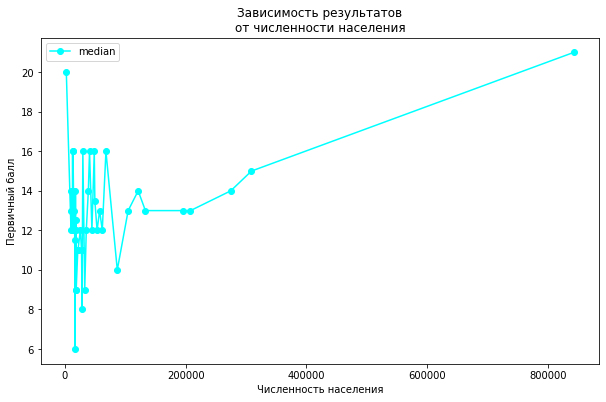

In [ ]:
results_population['Первичный балл'].plot(color=(0, 1, 1),
                                          marker='o',
                                          figsize=(10, 6),
                                          title='''Зависимость результатов
от численности населения''',
                                          ylabel='Первичный балл')

In [ ]:
full_data_gse_population['thousand people'] = 1000 * (full_data_gse_population['Численность населения'] // 1000)
results_population_2 = full_data_gse_population.pivot_table('Первичный балл', index='thousand people', aggfunc='mean')
results_population_2

,Первичный балл
thousand people,
2000.0,20.000000
10000.0,12.897959
11000.0,15.000000
12000.0,15.222222
13000.0,13.206897
15000.0,12.111940
16000.0,11.647059
17000.0,11.045455
18000.0,11.202703


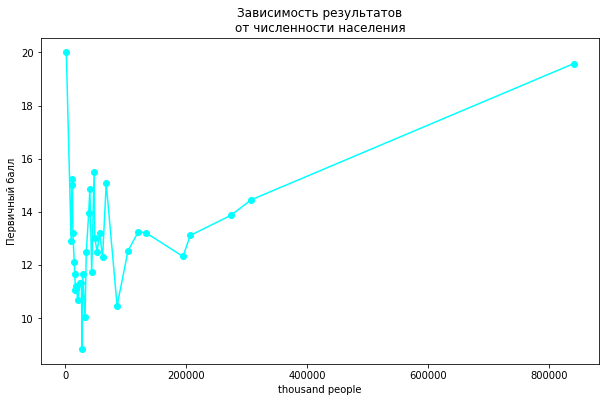

In [ ]:
results_population_2['Первичный балл'].plot(color=(0, 1, 1),
                                            marker='o',
                                          figsize=(10, 6),
                                          title='''Зависимость результатов
от численности населения''',
                                          ylabel='Первичный балл')

# Задание 2. Предсказание результатов ОГЭ

Задача - предсказывать оценки для новых участников (или восстанавливать утерянные).

## 0. Импорт библиотек, загрузка данных.

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [ ]:
#files.upload()

General state exam

In [ ]:
gse = pd.read_excel('5_OGE_2019_Эксперты и анализ.xlsx').drop(['GIA', 'Код предмета', 'Предмет'], axis=1)
gse.head()

,Код ОО,Краткое наименование ОО,Вид ОО,Тип ОО,Выпускник,Вариант,Часть В,1_Часть В,2_Часть В,3_Часть В,4_Часть В,5_Часть В,6_Часть В,7_Часть В,8_Часть В,9_Часть В,10_Часть В,11_Часть В,12_Часть В,13_Часть В,14_Часть В,15_Часть В,16_Часть В,17_Часть В,18_Часть В,Часть С,1_Часть С,2_Часть С,Часть D,Первичный балл,% Оценка,Оцека по 100,Оцека по 5
0,201033,МБОУ СОШ № 3 с. Александров-Гай Александрово-Г...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,75657,-++++-+++++++++---,-,+,+,+,+,-,+,+,+,+,+,+,+,+,+,-,-,-,0(2)2(2),0,2,NaN,15,68,0,4
1,203063,МОУ - СОШ № 9 г. Аткарска Саратовской области,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,73202,++++++++++++++++++,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,2(2)2(2),2,2,NaN,22,100,0,5
2,203063,МОУ - СОШ № 9 г. Аткарска Саратовской области,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74018,++-++-++-+---+----,+,+,-,+,+,-,+,+,-,+,-,-,-,+,-,-,-,-,0(2)0(2),0,0,NaN,8,36,0,3
3,204023,"МБОУ ""СОШ № 2 р.п. Базарный-Карабулак""",Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74810,+++++++++-+-+-+-++,+,+,+,+,+,+,+,+,+,-,+,-,+,-,+,-,+,+,0(2)2(2),0,2,NaN,16,72,0,4
4,205015,МАОУ Гимназия № 1,Гимназия,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74810,++++++++-++-++++++,+,+,+,+,+,+,+,+,-,+,+,-,+,+,+,+,+,+,2(2)0(2),2,0,NaN,18,81,0,5


## 1. Разбить данные на две группы, случайным образом отделив 10% (бОльшая группа - тренировочный набор, меньшая - проверочный набор).

In [ ]:
def generate_tables_for_train_and_test(gse_in):
  # creating list for check table
  list_for_gse_test = []
  for _ in range(598):
    x = random.randrange(5986)
    while x in list_for_gse_test:
      x = random.randrange(5986)
    list_for_gse_test.append(x)
  list_for_gse_test.sort()

  # creating list for train table
  list_for_gse_train = []
  for i in range(5986):
    if not i in list_for_gse_test:
      list_for_gse_train.append(i)

  # return check and train tables
  return gse_in.loc[list_for_gse_test, :], gse_in.loc[list_for_gse_train, :]

# main program
gse_test, gse_train = generate_tables_for_train_and_test(gse)
gse_test.head()

,Код ОО,Краткое наименование ОО,Вид ОО,Тип ОО,Выпускник,Вариант,Часть В,1_Часть В,2_Часть В,3_Часть В,4_Часть В,5_Часть В,6_Часть В,7_Часть В,8_Часть В,9_Часть В,10_Часть В,11_Часть В,12_Часть В,13_Часть В,14_Часть В,15_Часть В,16_Часть В,17_Часть В,18_Часть В,Часть С,1_Часть С,2_Часть С,Часть D,Первичный балл,% Оценка,Оцека по 100,Оцека по 5
2,203063,МОУ - СОШ № 9 г. Аткарска Саратовской области,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74018,++-++-++-+---+----,+,+,-,+,+,-,+,+,-,+,-,-,-,+,-,-,-,-,0(2)0(2),0,0,NaN,8,36,0,3
14,205083,МАОУ СОШ № 13,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,76449,--+-+-++-----+----,-,-,+,-,+,-,+,+,-,-,-,-,-,+,-,-,-,-,0(2)0(2),0,0,NaN,5,22,0,3
23,208053,"МОУ ""СОШ № 6""",Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,73202,+-+++-+++++++++-++,+,-,+,+,+,-,+,+,+,+,+,+,+,+,+,-,+,+,0(2)0(2),0,0,NaN,15,68,0,4
28,202023,МБОУ - СОШ № 2 города Аркадака,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,73202,--+++-+++----+++++,-,-,+,+,+,-,+,+,+,-,-,-,-,+,+,+,+,+,0(2)1(2),0,1,NaN,12,54,0,4
30,203024,МОУ - ООШ № 2,Основная общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74810,+++++++++++--+--++,+,+,+,+,+,+,+,+,+,+,+,-,-,+,-,-,+,+,2(2)0(2),2,0,NaN,16,72,0,4


## 2. Обработать тренировочные данные, сохранив информацию, необходимую для предсказания оценок. Используем следующие гипотезы: h0 средняя оценка по всем участникам, h1 медиана по той школе, из которой ученик, h2 среднее арифметическое по всем школам этого типа.

In [ ]:
def create_hypotheses(gse_train_in):
  gse_train_local = gse_train_in.loc[:, ['Код ОО', 'Вид ОО', 'Первичный балл']]
  h_0_local = gse_train_local['Первичный балл'].mean()
  h_1_local = gse_train_local.groupby('Код ОО').aggregate(np.median).rename(columns={'Первичный балл': 'h_1'})
  h_2_local = gse_train_local.groupby('Вид ОО').aggregate('mean').rename(columns={'Первичный балл': 'h_2'}).loc[:, ['h_2']]
  return h_0_local, h_1_local, h_2_local

# main program
h_0, h_1, h_2 = create_hypotheses(gse_train)

In [ ]:
h_0

13.2949146250928

In [ ]:
h_1.head()

,h_1
Код ОО,
201013,12.0
201023,10.0
201033,13.0
201053,9.0
201093,14.0


In [ ]:
h_2.head()

,h_2
Вид ОО,
Вечерняя (сменная) общеобразовательная школа,3.500000
Гимназия,16.521635
Кадетская школа-интернат,16.800000
Лицей,16.362587
Лицей-интернат,14.724138


## 3. Предсказать с помощью каждой гипотезы оценки всех учеников из проверочного набора.

In [ ]:
def create_table_with_predictions(gse_test_in, h_0_in, h_1_in, h_2_in):  
  gse_test_and_pred_local = gse_test_in.loc[:, ['Код ОО', 'Вид ОО', 'Первичный балл']]
  gse_test_and_pred_local['h_0'] = h_0_in
  gse_test_and_pred_local = gse_test_and_pred_local.set_index(['Код ОО', 'Вид ОО']).join([h_1_in, h_2_in])
  return gse_test_and_pred_local

# main program
gse_test_and_pred = create_table_with_predictions(gse_test, h_0, h_1, h_2)
gse_test_and_pred.head()

,,Первичный балл,h_0,h_1,h_2
Код ОО,Вид ОО,,,,
203063,Средняя общеобразовательная школа,8,13.294915,14.0,12.192064
205083,Средняя общеобразовательная школа,5,13.294915,11.0,12.192064
208053,Средняя общеобразовательная школа,15,13.294915,9.0,12.192064
202023,Средняя общеобразовательная школа,12,13.294915,8.0,12.192064
203024,Основная общеобразовательная школа,16,13.294915,NaN,10.873362


## 4. Рассчитать точность результатов предсказаний с помощью двух метрик: 
## 1) процент правильных угадываний 
## 2) ошибочный балл на человека - суммарное абсолютное расхождение в баллах, делённое на количество угадываний.

In [ ]:
def count_characteristics(gse_test_and_pred_in):
  # accuracy by subtask 1
  subtask_1_for_h_0_local = (abs(gse_test_and_pred_in['Первичный балл'] - gse_test_and_pred_in['h_0']) <= 0.1).sum() / gse_test_and_pred_in.shape[0] * 100
  subtask_1_for_h_1_local = (gse_test_and_pred_in['Первичный балл'] == gse_test_and_pred_in['h_1']).sum() / gse_test_and_pred_in.shape[0] * 100
  #subtask_1_for_h_2_local = (abs(gse_test_and_pred_in['Первичный балл'] - gse_test_and_pred_in['h_2']) <= 0.1).sum() / gse_test_and_pred_in.shape[0] * 100
  subtask_1_for_h_2_local = (abs(gse_test_and_pred_in['Первичный балл'] - gse_test_and_pred_in['h_2']) <= 0.5).sum() / gse_test_and_pred_in.shape[0] * 100

  # accuracy by subtask 2
  subtask_2_for_h_0_local = abs(gse_test_and_pred_in['Первичный балл'] - gse_test_and_pred_in['h_0']).sum() / gse_test_and_pred_in.shape[0]
  subtask_2_for_h_1_local = abs(gse_test_and_pred_in['Первичный балл'] - gse_test_and_pred_in['h_1']).sum() / gse_test_and_pred_in.shape[0]
  subtask_2_for_h_2_local = abs(gse_test_and_pred_in['Первичный балл'] - gse_test_and_pred_in['h_2']).sum() / gse_test_and_pred_in.shape[0]

  return [[subtask_1_for_h_0_local, subtask_2_for_h_0_local], [subtask_1_for_h_1_local, subtask_2_for_h_1_local], [subtask_1_for_h_2_local,   subtask_2_for_h_2_local]]

# main program
# count mean for accuracies
subtask_h_list = count_characteristics(gse_test_and_pred)
# create dataset for accuracies
accuracy_df = pd.DataFrame({'h_0': subtask_h_list[0], 
                            'h_1': subtask_h_list[1], 
                            'h_2': subtask_h_list[2]},
                           index=['Accuracy 1, %', 'Accuracy 2, points'])
accuracy_df

,h_0,h_1,h_2
"Accuracy 1, %",0.000000,7.525084,8.361204
"Accuracy 2, points",4.535888,3.642977,4.120445


## 5. Усреднить результаты, повторив пункты 1-4 несколько раз для каждого способа.

In [ ]:
# main program
number_of_iterations = int(input("Введите количество повторов: "))
# result accuracies
sum_subtask_h_list = [[0 for _ in range(2)] for _ in range(3)]
for _ in range(number_of_iterations):
  # task 1
  gse_test_cur, gse_train_cur = generate_tables_for_train_and_test(gse)
  # task 2
  h_0_cur, h_1_cur, h_2_cur = create_hypotheses(gse_train_cur)
  # task 3
  gse_test_and_pred_cur = create_table_with_predictions(gse_test_cur, h_0_cur, h_1_cur, h_2_cur)
  # task 4
  subtask_h_list_cur = count_characteristics(gse_test_and_pred_cur)
  for i in range(3):
    for j in range(2):
      sum_subtask_h_list[i][j] += subtask_h_list_cur[i][j]

# count mean for accuracies
task_5_list = [[sum_subtask_h_list[i][j] / number_of_iterations for j in range(2)] for i in range(3)]
# create dataset for accuracies
accuracy_df = pd.DataFrame({'h_0': task_5_list[0], 
                            'h_1': task_5_list[1], 
                            'h_2': task_5_list[2]},
                           index=['Accuracy 1, %', 'Accuracy 2, points'])
accuracy_df

Введите количество повторов: 10


,h_0,h_1,h_2
"Accuracy 1, %",0.000000,7.157191,6.337793
"Accuracy 2, points",4.576304,3.700585,4.192551


## 6. Придумать свой способ, повторить для него пункты 1-5, он должен быть лучше, чем способ номер h0.

### Подпункт 0. Считаем, что библиотеки подключены, файл загружен. Добавляем столбцы с суммой баллов за вторую и первую части.

In [ ]:
gse_for_task_6 = pd.read_excel('5_OGE_2019_Эксперты и анализ.xlsx').drop(['GIA', 'Код предмета', 'Предмет'], axis=1)
gse_for_task_6['sum_part_C'] = gse_for_task_6['1_Часть С'] + gse_for_task_6['2_Часть С']
gse_for_task_6['sum_part_B'] = gse_for_task_6['Первичный балл'] - gse_for_task_6['sum_part_C']
gse_for_task_6.head()

,Код ОО,Краткое наименование ОО,Вид ОО,Тип ОО,Выпускник,Вариант,Часть В,1_Часть В,2_Часть В,3_Часть В,4_Часть В,5_Часть В,6_Часть В,7_Часть В,8_Часть В,9_Часть В,10_Часть В,11_Часть В,12_Часть В,13_Часть В,14_Часть В,15_Часть В,16_Часть В,17_Часть В,18_Часть В,Часть С,1_Часть С,2_Часть С,Часть D,Первичный балл,% Оценка,Оцека по 100,Оцека по 5,sum_part_C,sum_part_B
0,201033,МБОУ СОШ № 3 с. Александров-Гай Александрово-Г...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,75657,-++++-+++++++++---,-,+,+,+,+,-,+,+,+,+,+,+,+,+,+,-,-,-,0(2)2(2),0,2,NaN,15,68,0,4,2,13
1,203063,МОУ - СОШ № 9 г. Аткарска Саратовской области,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,73202,++++++++++++++++++,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,2(2)2(2),2,2,NaN,22,100,0,5,4,18
2,203063,МОУ - СОШ № 9 г. Аткарска Саратовской области,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74018,++-++-++-+---+----,+,+,-,+,+,-,+,+,-,+,-,-,-,+,-,-,-,-,0(2)0(2),0,0,NaN,8,36,0,3,0,8
3,204023,"МБОУ ""СОШ № 2 р.п. Базарный-Карабулак""",Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74810,+++++++++-+-+-+-++,+,+,+,+,+,+,+,+,+,-,+,-,+,-,+,-,+,+,0(2)2(2),0,2,NaN,16,72,0,4,2,14
4,205015,МАОУ Гимназия № 1,Гимназия,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74810,++++++++-++-++++++,+,+,+,+,+,+,+,+,-,+,+,-,+,+,+,+,+,+,2(2)0(2),2,0,NaN,18,81,0,5,2,16


### Подпункт 1. Делим таблицу на тренировочную и проверочную части в соотношении 9:1.

In [ ]:
gse_test_for_task_6, gse_train_for_task_6 = generate_tables_for_train_and_test(gse_for_task_6)
gse_test_for_task_6.head()

,Код ОО,Краткое наименование ОО,Вид ОО,Тип ОО,Выпускник,Вариант,Часть В,1_Часть В,2_Часть В,3_Часть В,4_Часть В,5_Часть В,6_Часть В,7_Часть В,8_Часть В,9_Часть В,10_Часть В,11_Часть В,12_Часть В,13_Часть В,14_Часть В,15_Часть В,16_Часть В,17_Часть В,18_Часть В,Часть С,1_Часть С,2_Часть С,Часть D,Первичный балл,% Оценка,Оцека по 100,Оцека по 5,sum_part_C,sum_part_B
5,205016,МАОУ Лицей № 1,Лицей,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74018,++++++++++++++++++,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,2(2)2(2),2,2,NaN,22,100,0,5,4,18
6,205025,МАОУ Гимназия № 2,Гимназия,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74018,+++++-+-+----+--++,+,+,+,+,+,-,+,-,+,-,-,-,-,+,-,-,+,+,0(2)2(2),0,2,NaN,12,54,0,4,2,10
7,205026,МАОУ Лицей № 2,Лицей,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,74810,++-++-+++++--+-+--,+,+,-,+,+,-,+,+,+,+,+,-,-,+,-,+,-,-,2(2)0(2),2,0,NaN,13,59,0,4,2,11
21,206106,МОУ Лицей г. Балашова,Лицей,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,80255,--+++-++---+----+-,-,-,+,+,+,-,+,+,-,-,-,+,-,-,-,-,+,-,0(2)0(2),0,0,NaN,7,31,0,3,0,7
31,203033,МОУ - СОШ № 3 г. Аткарска Саратовской области ...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,73202,+++++-+++++++++-+-,+,+,+,+,+,-,+,+,+,+,+,+,+,+,+,-,+,-,2(2)0(2),2,0,NaN,17,77,0,4,2,15


### Подпункт 2. Гипотеза h3 - медиана по баллам за часть С, h4 - медиана по баллам за часть B, h3 - медиана по варианту, обрабатываем тренировочный набор данных, считаем h0, h3, h4, h5.

In [ ]:
def create_hypotheses_for_task_6(gse_train_in):
  gse_train_local = gse_train_in.loc[:, ['Первичный балл', 'sum_part_C', 'sum_part_B', 'Вариант']]
  h_0_local = gse_train_local['Первичный балл'].mean()
  h_3_local = gse_train_local.groupby('sum_part_C').aggregate(np.median).rename(columns={'Первичный балл': 'h_3'}).loc[:, ['h_3']]
  h_4_local = gse_train_local.groupby('sum_part_B').aggregate(np.median).rename(columns={'Первичный балл': 'h_4'}).loc[:, ['h_4']]
  h_5_local = gse_train_local.groupby('Вариант').aggregate(np.median).rename(columns={'Первичный балл': 'h_5'}).loc[:, ['h_5']]
  return h_0_local, h_3_local, h_4_local, h_5_local

# main program
h_0_for_task_6, h_3_for_task_6, h_4_for_task_6, h_5_for_task_6 = create_hypotheses_for_task_6(gse_train_for_task_6)

In [ ]:
h_3_for_task_6

,h_3
sum_part_C,
0,10.0
1,14.0
2,16.0
3,18.0
4,21.0


In [ ]:
h_4_for_task_6

,h_4
sum_part_B,
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
5,5.0
6,6.0
7,7.0
8,8.0


In [ ]:
h_5_for_task_6

,h_5
Вариант,
70683,13.0
73202,15.0
74018,15.0
74810,13.0
75657,12.0
76449,13.0
80255,14.0
81092,11.5
81894,10.0


### Подпункт 3. Обрабатываем проверочный набор данных, добавляем столбцы в соответствии с гипотезами.

In [ ]:
def create_table_with_predictions_for_task_6(gse_test_in, h_0_in, h_3_in, h_4_in, h_5_in):  
  gse_test_and_pred_local = gse_test_in.loc[:, ['Первичный балл', 'sum_part_C', 'sum_part_B', 'Вариант']]
  gse_test_and_pred_local['h_0'] = h_0_in
  gse_test_and_pred_local = gse_test_and_pred_local.set_index(['sum_part_C', 'sum_part_B', 'Вариант']).join([h_3_in, h_4_in, h_5_in])
  return gse_test_and_pred_local

# main program
gse_test_and_pred_for_task_6 = create_table_with_predictions_for_task_6(gse_test_for_task_6, h_0_for_task_6, h_3_for_task_6, h_4_for_task_6, h_5_for_task_6)
gse_test_and_pred_for_task_6.head()

Первичный балл        h_0   h_3   h_4   h_5
sum_part_C sum_part_B Вариант                                             
4          18         74018                22  13.263177  21.0  22.0  15.0
2          10         74018                12  13.263177  16.0  10.0  15.0
           11         74810                13  13.263177  16.0  11.0  13.0
0          7          80255                 7  13.263177  10.0   7.0  14.0
2          15         73202                17  13.263177  16.0  17.0  15.0

### Подпункт 4. Считаем точность результатов предсказаний с помощью двух метрик:
### 1) процент правильных угадываний
### 2) ошибочный балл на человека - суммарное абсолютное расхождение в баллах, делённое на количество угадываний.

In [ ]:
def count_characteristics_for_task_6(gse_test_and_pred_in):
  # accuracy by subtask 1
  subtask_1_for_h_0_local = (abs(gse_test_and_pred_in['Первичный балл'] - gse_test_and_pred_in['h_0']) <= 0.1).sum() / gse_test_and_pred_in.shape[0] * 100
  subtask_1_for_h_3_local = (gse_test_and_pred_in['Первичный балл'] == gse_test_and_pred_in['h_3']).sum() / gse_test_and_pred_in.shape[0] * 100
  subtask_1_for_h_4_local = (gse_test_and_pred_in['Первичный балл'] == gse_test_and_pred_in['h_4']).sum() / gse_test_and_pred_in.shape[0] * 100
  subtask_1_for_h_5_local = (gse_test_and_pred_in['Первичный балл'] == gse_test_and_pred_in['h_5']).sum() / gse_test_and_pred_in.shape[0] * 100

  # accuracy by subtask 2
  subtask_2_for_h_0_local = abs(gse_test_and_pred_in['Первичный балл'] - gse_test_and_pred_in['h_0']).sum() / gse_test_and_pred_in.shape[0]
  subtask_2_for_h_3_local = abs(gse_test_and_pred_in['Первичный балл'] - gse_test_and_pred_in['h_3']).sum() / gse_test_and_pred_in.shape[0]
  subtask_2_for_h_4_local = abs(gse_test_and_pred_in['Первичный балл'] - gse_test_and_pred_in['h_4']).sum() / gse_test_and_pred_in.shape[0]
  subtask_2_for_h_5_local = abs(gse_test_and_pred_in['Первичный балл'] - gse_test_and_pred_in['h_5']).sum() / gse_test_and_pred_in.shape[0]

  return [[subtask_1_for_h_0_local, subtask_2_for_h_0_local], 
          [subtask_1_for_h_3_local, subtask_2_for_h_3_local],
          [subtask_1_for_h_4_local, subtask_2_for_h_4_local],
          [subtask_1_for_h_5_local, subtask_2_for_h_5_local]]

# main program
# count mean for accuracies
task_6_list = count_characteristics_for_task_6(gse_test_and_pred_for_task_6)
# create dataset for accuracies
accuracy_df_for_task_6 = pd.DataFrame({'h_0': task_6_list[0], 
                                       'h_3': task_6_list[1],
                                       'h_4': task_6_list[2],
                                       'h_5': task_6_list[3]},
                                      index=['Accuracy 1, %', 'Accuracy 2, points'])
accuracy_df_for_task_6

,h_0,h_3,h_4,h_5
"Accuracy 1, %",0.00000,13.210702,47.658863,5.351171
"Accuracy 2, points",4.57569,2.603679,0.823579,4.386288


### Подпункт 5. Повторяем несколько раз, усредняем.

In [ ]:
number_of_iterations_for_task_6 = int(input("Введите количество повторов: "))
# result accuracies
sum_subtask_h_list_for_task_6 = [[0 for _ in range(2)] for _ in range(4)]
for _ in range(number_of_iterations_for_task_6):
  # task 1
  gse_test_for_task_6_cur, gse_train_for_task_6_cur = generate_tables_for_train_and_test(gse_for_task_6)
  # task 2
  h_0_for_task_6_cur, h_3_for_task_6_cur, h_4_for_task_6_cur, h_5_for_task_6_cur = create_hypotheses_for_task_6(gse_train_for_task_6_cur)
  # task 3
  gse_test_and_pred_for_task_6_cur = create_table_with_predictions_for_task_6(gse_test_for_task_6_cur, 
                                                                              h_0_for_task_6_cur, 
                                                                              h_3_for_task_6_cur, 
                                                                              h_4_for_task_6_cur, 
                                                                              h_5_for_task_6_cur)
  # task 4
  subtask_h_list_for_task_6_cur = count_characteristics_for_task_6(gse_test_and_pred_for_task_6_cur)
  # add accuracies to sum
  for i in range(4):
    for j in range(2):
      sum_subtask_h_list_for_task_6[i][j] += subtask_h_list_for_task_6_cur[i][j]

# count mean for accuracies
task_6_list = [[sum_subtask_h_list_for_task_6[i][j] / number_of_iterations_for_task_6 for j in range(2)] for i in range(4)]
# create dataset for accuracies
accuracy_df_for_task_6 = pd.DataFrame({'h_0': task_6_list[0], 
                                       'h_3': task_6_list[1],
                                       'h_4': task_6_list[2],
                                       'h_5': task_6_list[3]},
                                      index=['Accuracy 1, %', 'Accuracy 2, points'])
accuracy_df_for_task_6

Введите количество повторов: 10


,h_0,h_3,h_4,h_5
"Accuracy 1, %",0.000000,11.989967,50.752508,6.070234
"Accuracy 2, points",4.548156,2.648495,0.776672,4.386957


## 7. Предположить, почему так всё плохо, какие данные помогли бы предсказывать лучше, какие из них реально получить.

Самая плохая гипотеза, очевидно,  средний балл по всем ученикам. Ученики разные, соответственно, усредняя балл, нормально предсказать не выйдет. Гипотезы в соответствии с видом и кодом ОО также плохи, потому что учителя и ученики могут быть разными. Также ученики могут заниматься в кружках, с репетиторами, самостоятельно прорешивать варианты экзамена. Гипотеза в соответствии с вариантом тоже дает небольшую точность, по той же причине, что и среднее арифметическое. Гипотезы в соответствии с баллами за первую и вторую часть получше, но также не слишком точны. Ученик может прекрасно решить вторую часть, но ошибиться в первой, или наоборот, ученик может быть прекрасно натаскан на первую часть, но не программировать (когда я сдавала ОГЭ, несколько человек из аудитории вообще не стали решать вторую часть). Ещё нельзя исключать проблемы с компьютером и файлами. Когда я сдавала ОГЭ, у одной девочки из аудитории ноутбук вообще не функционировал (в итоге принесли другой, не знаю, чем всё закончилось), я же, после того, как сделала задание на Excel, обнаружила, что никакой Pascal (ABC, Free) у меня не запускается (в итоге на парте стояли два ноутбука, на одном одно задание из второй части, на другом - другое,  и лежали горы бумажек, очень боялась, что что-то потеряется).

Предположения, какие данные можно было бы попробовать добавить:


1.   Оценки ученика по информатике. Плохо тем, что, например, в мой год в ЛМИ было 34 учеников с оценкой 5 (от 18 баллов включительно), в том числе 15 человек с максимальным баллом, и только 4 с оценкой 4, причем минимальный балл составил 16. Разумеется, не у всех отличников была такая же оценка по информатике. В школах без углубленного изучения информатики может быть обратная ситуация, отличники напишут плохо. Можно попробовать сгруппировать по двум признакам - оценки и код ОО. 
2.   Учителя информатики. Может быть школа без углубленного изучения информатики, но очень сильный учитель. Посещаемость - какой бы сильный не был учитель, если ученик не ходил, результат будет соответствующий.
3. Преподаватели кружка/спецкурса  по информатике, если такой имеется, и данные о том, посещал ли ученик этот кружок/спецкурс регулярно.
4. Данные из пунктов 1-3, но по математике.
5. Данные о кружках и репетиторах вне школы, посещаемость.
6. Статистика самостоятельно решаемых заданий, например, с сайта решу ОГЭ, если ученик там регулярно занимался или если решал задания откуда-то ещё. 
7. Данные о том, как ученик писал пробники в течение предыдущего года, обязательно несколько.





 Пункт 1 реально получить; данные об учителях и преподавателях из пунктов 2-3 также можно достать, данные о посещаемости из пунктов 2-3 достать сложно, особенно 3; 5 можно, если в школе есть такая статистика; 6 - выгрузку с сайта решу ОГЭ или похожей системы  реально, а вот из других мест, наприме, если ученик решал у себя в тетради, нереально; 7 также можно, если в школах есть такая статистика (зависит от пробников, например, по СтатГрадам ведется статистика, но они хуже для предсказания, так как не всегда соответствуют ОГЭ).



